In [1]:
import matplotlib.pyplot as plt
from skimage.exposure import rescale_intensity
from skimage import io, filters, color, measure
from skimage.feature import peak_local_max
from scipy import ndimage 
import numpy as np
import xlrd
import freud.box
from freud import box, density
from scipy import stats
import os
%matplotlib inline
    
def get_dots2(file,microns=2,compare=False,size=2,spacing=5):
    image = color.rgb2gray(io.imread(file))
    i1 = filters.gaussian(image,sigma=.7)
    i1 = ndimage.maximum_filter(i1,size=size,mode='constant')
    coordinates = peak_local_max(i1, min_distance=spacing,indices=False)
    if compare:
        io.imshow(image -coordinates)
    label_img = measure.label(coordinates)
    centroids = []
    for region in measure.regionprops(label_img):
        centroids.append(region.centroid)
    scaled = microns*np.asarray(centroids)/image.shape - [microns/2,microns/2]
    return np.append(scaled,np.zeros((len(scaled),1)),axis=1)

def plot_rdf(dots,L,plot=True):
    box = freud.box.Box(L,L,is2D=True)
    box.periodic=[True,True,False]
    rdf = freud.density.RDF(25,.200,normalize=True) #new nums for nanometers
    rdf.compute(system=(box,dots),reset=True)
    if plot:
        plt.scatter(rdf.bin_centers*1000, rdf.rdf)
        plt.xlabel("r (nm)")
        plt.ylabel("<g(r)>")
        plt.show()
    return rdf.bin_centers, rdf.rdf

In [2]:
rdfs = []


28.17180849095055


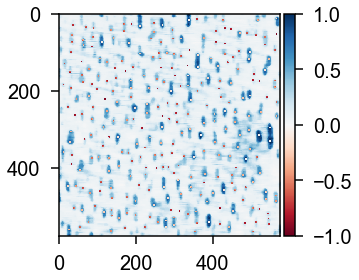

In [3]:
L=.5
R=[]
dots=get_dots2("405/0.5a.tif",compare=True,microns=L,size=5, spacing=10) #size 5, spacing 10-15 seems reasonable
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

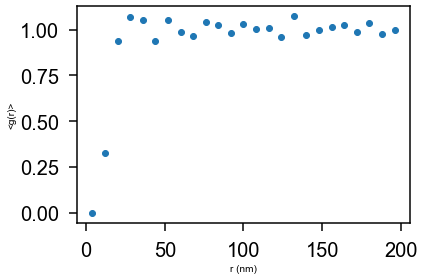

In [4]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


34.668762264076825


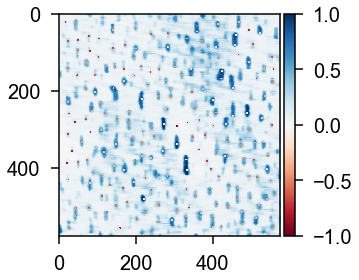

In [5]:
L=.5
dots=get_dots2("405/0.5b.tif",compare=True, microns =L,size=5, spacing=15)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

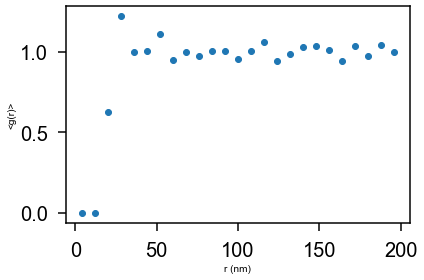

In [6]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


35.99078753743473


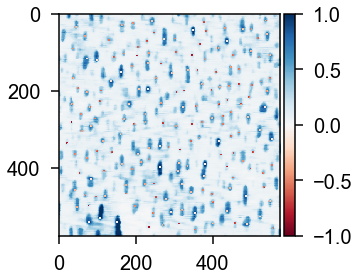

In [7]:
dots=get_dots2("405/0.5c.tif",compare=True, microns =L,size=5 ,spacing=15)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

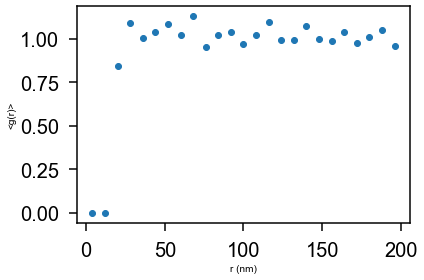

In [8]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


35.623524993954824


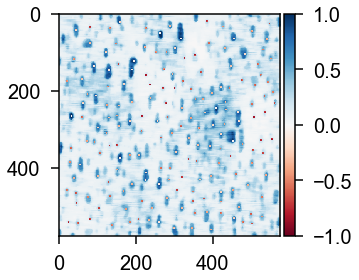

In [9]:
dots=get_dots2("405/0.5d.tif",compare=True, microns =L, size=5, spacing=15)
b=1/np.sqrt(len(dots)/(L*1000*1000*L))
print(b)
R.append(b)

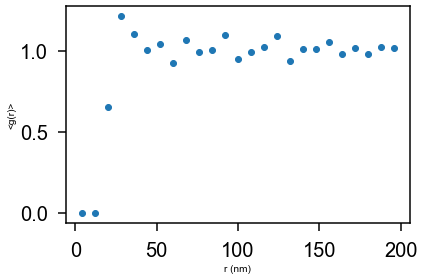

In [10]:
rdfs.append(plot_rdf(dots,L,plot=True)[1])


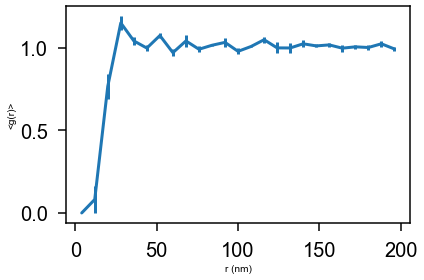

In [11]:
rdfs = np.asarray(rdfs)
mean_count = np.mean(rdfs,axis=0)
sem =  stats.sem(rdfs, axis=0, ddof=1)
r,rdf = plot_rdf(dots,L,plot=False)
plt.errorbar(1000*r, mean_count, yerr=sem)
plt.xlabel("r (nm)")
#plt.xlabel("r/<R>")
plt.ylabel("<g(r)>")
plt.savefig("M405.png")
np.savetxt("M405.csv",(1000*r,mean_count,sem),delimiter=',')
plt.show()

In [12]:
R

[28.17180849095055, 34.668762264076825, 35.99078753743473, 35.623524993954824]

In [13]:
print(np.mean(R),np.std(R))

33.61372082160423 3.1787293547328885
